In [1]:
%load_ext autoreload
%autoreload 2

In [93]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from skipper import observe

In [3]:
sys.path.append('../scripts')

In [16]:
import make_pointings
import sigjson_f2021b

In [66]:
mastercat = sigjson_f2021b.load_mastercat('n536')

In [160]:
datelist_vvdsxmm_n536 =  [(2021,9,ix) for ix in np.arange(3, 10)] 
datelist_vvdsxmm_n536 += [(2021,11,ix) for ix in np.arange(1,8)]
nightslot_vvdsxmm_n536 = [2 for ix in np.arange(3,10)]
nightslot_vvdsxmm_n536 += [1 for ix in np.arange(1,8)] # 0: full, 1: first half, 2: second half
priorities_n536 = {'VVDS':0, 'XMM':1}     

In [234]:
datelist_vvdsxmm_n702 =  [(2021,9,ix) for ix in np.arange(10,13)]
datelist_vvdsxmm_n702 +=  [(2021,11,ix) for ix in np.arange(8,12)]
datelist_vvdsxmm_n702 += [(2021,11,ix) for ix in np.arange(27, 31)]
nightslot_vvdsxmm_n702 = [2 for ix in np.arange(10,13)]
nightslot_vvdsxmm_n702 += [1 for ix in np.arange(8,12)]
nightslot_vvdsxmm_n702 += [1 for ix in np.arange(27,31)] 
priorities_n702 = {'VVDS':0, 'XMM':1}                          

In [161]:
iqt_n536 = sigjson_f2021b.predict_f2021b ( 'n536', datelist_vvdsxmm_n536, 
                                          nightslot_vvdsxmm_n536,
                                          priorities=priorities_n536,
                                          pad_last_hour=False)

[predict] night slot: Second half
obsStart: 2021/09/04 12:42 AM Santiago
          2021/09/04 12:42 AM ET
          2021/09/04 04:42 AM UTC
obsEnd:   2021/09/04 05:53 AM Santiago
          2021/09/04 05:53 AM ET
          2021/09/04 09:53 AM UTC

==> 20210904_04, 1080.000000000009s available
900.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20210904_05, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20210904_06, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20210904_07, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20210904_08, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects

==> 20210904_09, 3179.9999999999613s available
0.0s filled by priority=0.0 objects
2700.0s filled by priority=1.0 objects
[predict] night slot: Second half
obsStart: 2021/09/05 01:42 AM Sa


==> 20211104_00, 2760.000000000003s available
2700.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20211104_01, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20211104_02, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20211104_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects

==> 20211104_04, 1589.9999999999766s available
0.0s filled by priority=0.0 objects
900.0s filled by priority=1.0 objects
[predict] night slot: First half
obsStart: 2021/11/04 09:15 PM Santiago
          2021/11/04 08:15 PM ET
          2021/11/05 12:15 AM UTC
obsEnd:   2021/11/05 01:26 AM Santiago
          2021/11/05 12:26 AM ET
          2021/11/05 04:26 AM UTC

==> 20211105_00, 2700.0000000000036s available
2700.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20211105_01, 3600.0s available
3600.0s filled by p

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:389: UserWarning: Queue unfilled at 20211107_03
  if save:
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211107_04
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')


[predict] night slot: First half
obsStart: 2021/11/07 09:18 PM Santiago
          2021/11/07 07:18 PM ET
          2021/11/08 12:18 AM UTC
obsEnd:   2021/11/08 01:26 AM Santiago
          2021/11/07 11:26 PM ET
          2021/11/08 04:26 AM UTC

==> 20211108_00, 2520.000000000004s available
1800.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20211108_01, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211108_02, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211108_03, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211108_04, 1589.9999999999766s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211108_01
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211108_02
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211108_03
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211108_04
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')


In [236]:
iqt_n702 = sigjson_f2021b.predict_f2021b ( 'n702', 
                                          datelist_vvdsxmm_n702, 
                                          nightslot_vvdsxmm_n702,
                                          priorities=priorities_n702,
                                          pad_last_hour=False)

[predict] night slot: Second half
obsStart: 2021/09/11 01:40 AM Santiago
          2021/09/11 12:40 AM ET
          2021/09/11 04:40 AM UTC
obsEnd:   2021/09/11 06:45 AM Santiago
          2021/09/11 05:45 AM ET
          2021/09/11 09:45 AM UTC

==> 20210911_04, 1200.0000000000086s available
1200.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20210911_05, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20210911_06, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20210911_07, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20210911_08, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects

==> 20210911_09, 2699.999999999963s available
0.0s filled by priority=0.0 objects
2400.0s filled by priority=1.0 objects
[predict] night slot: Second half
obsStart: 2021/09/12 01:39 AM S

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:389: UserWarning: Queue unfilled at 20211128_03
  if save:
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211128_04
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')


[predict] night slot: First half
obsStart: 2021/11/28 09:40 PM Santiago
          2021/11/28 07:40 PM ET
          2021/11/29 12:40 AM UTC
obsEnd:   2021/11/29 01:31 AM Santiago
          2021/11/28 11:31 PM ET
          2021/11/29 04:31 AM UTC

==> 20211129_00, 1200.0000000000039s available
1200.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20211129_01, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211129_02, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211129_03, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211129_01
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211129_02
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211129_03
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')




==> 20211129_04, 1889.9999999999757s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211129_04
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')


[predict] night slot: First half
obsStart: 2021/11/29 09:41 PM Santiago
          2021/11/29 07:41 PM ET
          2021/11/30 12:41 AM UTC
obsEnd:   2021/11/30 01:32 AM Santiago
          2021/11/29 11:32 PM ET
          2021/11/30 04:32 AM UTC

==> 20211130_00, 1140.000000000004s available
600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20211130_01, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211130_02, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211130_01
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211130_02
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211130_03
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')



==> 20211130_03, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211130_04, 1919.9999999999802s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211130_04
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')


[predict] night slot: First half
obsStart: 2021/11/30 09:42 PM Santiago
          2021/11/30 07:42 PM ET
          2021/12/01 12:42 AM UTC
obsEnd:   2021/12/01 01:32 AM Santiago
          2021/11/30 11:32 PM ET
          2021/12/01 04:32 AM UTC

==> 20211201_00, 1080.0000000000043s available
600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects

==> 20211201_01, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211201_02, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211201_03, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!

==> 20211201_04, 1919.9999999999802s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211201_01
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211201_02
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211201_03
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:386: UserWarning: Queue empty at 20211201_04
  print(f'!!! Cannot fill queue !!! {avail_queue_time}, {catalog["expTime"].mean()}')


In [153]:
mastercat_n536 = sigjson_f2021b.load_mastercat ('n536')
mastercat_n702 = sigjson_f2021b.load_mastercat ('n702')

In [248]:
np.where(iqt_n536.sort_values('qstamp').index == name)[0][0]

92

In [265]:
plt.rcParams['font.size'] = 15

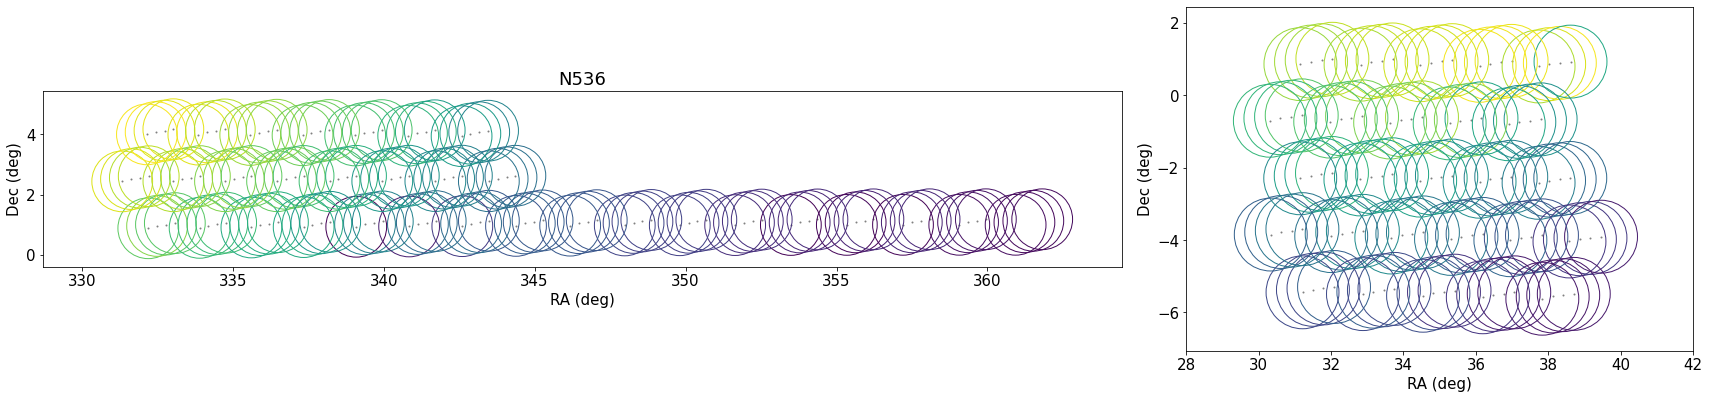

In [269]:
fig = plt.figure(figsize=(24,8))
fov_radius = (3.18/np.pi)**0.5
shp = (1,3)
ax0 = plt.subplot2grid(shp, (0,0), colspan=2)
ax1 = plt.subplot2grid(shp, (0,2) )
for name,row in mastercat_n536.iterrows():
    qrow = iqt.loc[name]
    if (row.RA > 50):
        ax = ax0
        ra = row.RA
    elif row.RA < 10:
        ax = ax0
        ra = row.RA + 360.
    else:
        ax = ax1
        ra = row.RA
    if qrow.is_queued:
        cval = np.where(iqt_n536.sort_values('qstamp').index == name)[0][0]
        ec= plt.cm.viridis( cval/iqt_n536.shape[0] )
    else:
        ec='lightgray'
    patch = patches.Circle ( (ra, row.dec), fov_radius, ec=ec, #plt.cm.viridis((hr+5)/10.), 
                            fc='None')
    
    ax.add_patch(patch)

mask = (mastercat.RA > 50)
ax0.scatter(mastercat.loc[mask,'RA'], mastercat.loc[mask,'dec'], s=1, color='grey')
ax0.set_aspect('equal')
ax1.scatter(mastercat.loc[~mask,'RA'], mastercat.loc[~mask,'dec'], s=1, color='grey')
ax1.set_xlim(28.,42.)
ax1.set_aspect('equal')
ax0.set_title('N536')
for ax in [ax0,ax1]:
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('Dec (deg)')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/n536_map.png')

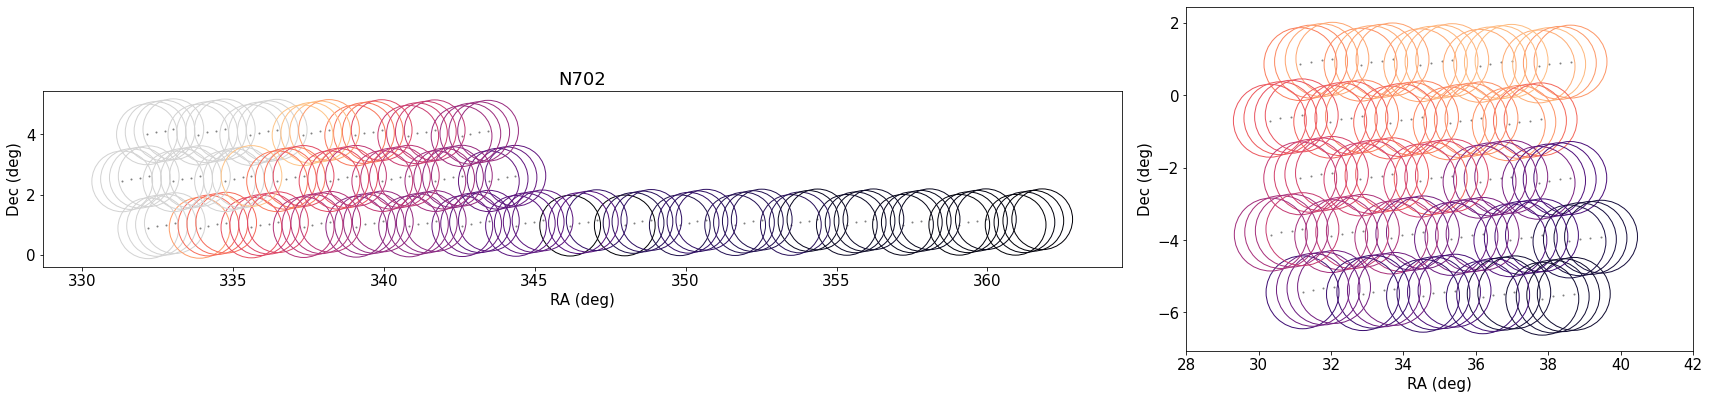

In [270]:
fig = plt.figure(figsize=(24,8))
fov_radius = (3.18/np.pi)**0.5
shp = (1,3)
ax0 = plt.subplot2grid(shp, (0,0), colspan=2)
ax1 = plt.subplot2grid(shp, (0,2) )
for name,row in mastercat_n702.iterrows():
    qrow = iqt_n702.loc[name]
    if (row.RA > 50):
        ax = ax0
        ra = row.RA
    elif row.RA < 10:
        ax = ax0
        ra = row.RA + 360.
    else:
        ax = ax1
        ra = row.RA
    if qrow.is_queued:
        cval = np.where(iqt_n702.sort_values('qstamp').index == name)[0][0]
        ec= plt.cm.magma( cval/iqt_n702.shape[0] )
    else:
        ec='lightgray'
    patch = patches.Circle ( (ra, row.dec), fov_radius, ec=ec, #plt.cm.viridis((hr+5)/10.), 
                            fc='None')
    
    ax.add_patch(patch)

mask = (mastercat.RA > 50)
ax0.scatter(mastercat.loc[mask,'RA'], mastercat.loc[mask,'dec'], s=1, color='grey')
ax0.set_aspect('equal')
ax1.scatter(mastercat.loc[~mask,'RA'], mastercat.loc[~mask,'dec'], s=1, color='grey')
ax1.set_xlim(28.,42.)
ax1.set_aspect('equal')
ax0.set_title('N702')

for ax in [ax0,ax1]:
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('Dec (deg)')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/n702_map.png')

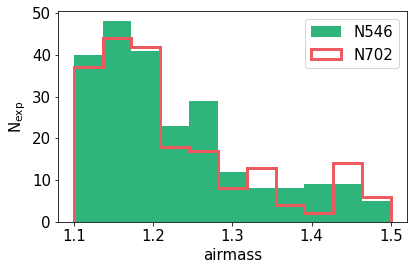

In [271]:
bins = np.linspace(1.1,1.5,12)
plt.hist(iqt_n536.airmass.astype(float), bins=bins,
         color=plt.cm.viridis(0.65), label='N546')
plt.hist(iqt_n702.airmass.astype(float), bins=bins,
         color=plt.cm.magma(0.65), histtype='step', lw=3, label='N702')
plt.legend()
plt.xlabel('airmass')
plt.ylabel(r'N$_{\rm exp}$')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/airmass.png')

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

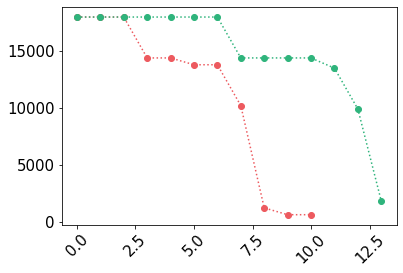

In [298]:
exptimes = [600., 900.]
colors = [plt.cm.magma(0.65), plt.cm.viridis(0.65)]
for ix,iqt in enumerate([iqt_n702, iqt_n536]):
    sched = iqt.dropna()
    grps = sched.groupby(sched.apply(lambda x: int(x['qstamp'].split('_')[0]), axis=1))

    cg = grps.count()

    dt_l = []
    for idx in cg.index: 
        month = int(str(idx)[4:6])
        day = int(str(idx)[-2:])
        dt_l.append(datetime.datetime(2021, month, day))

    plt.plot(np.arange(len(dt_l)), cg['is_queued']*exptimes[ix], 'o:', color=colors[ix])
plt.xticks(rotation=45)

In [288]:
dt

datetime.datetime(2021, 12, 1, 0, 0)